# Small Size Image Classfication

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

/Users/haoyushe/Code(Local)/tensorflow2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 65, 65

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
# 90% train and 10% test
nb_train_samples = 240
nb_validation_samples = 60
epochs = 100
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3)) #6分类
model.add(Activation('softmax')) #采用Softmax

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 63, 63, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [3]:
model.compile(loss='categorical_crossentropy', #多分类
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #多分类

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #多分类

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Epoch 1/100
12/12 [==============================] - 2s 136ms/step - loss: 1.0866 - acc: 0.3833 - val_loss: 1.0081 - val_acc: 0.3500
Epoch 2/100
12/12 [==============================] - 1s 83ms/step - loss: 1.0800 - acc: 0.4458 - val_loss: 0.7883 - val_acc: 0.7500
Epoch 3/100
12/12 [==============================] - 1s 83ms/step - loss: 0.9634 - acc: 0.5417 - val_loss: 0.8175 - val_acc: 0.6333
Epoch 4/100
12/12 [==============================] - 1s 84ms/step - loss: 0.8973 - acc: 0.5708 - val_loss: 0.8419 - val_acc: 0.5833
Epoch 5/100
12/12 [==============================] - 1s 83ms/step - loss: 0.7933 - acc: 0.6417 - val_loss: 0.8059 - val_acc: 0.5667
Epoch 6/100
12/12 [==============================] - 1s 83ms/step - loss: 0.8920 - acc: 0.5583 - val_loss: 0.7252 - val_acc: 0.7333
Epoch 7/100
12/12 [==============================] - 1s 83ms/step - loss: 0.8544 - acc: 0.6208 - val_loss: 0.6455 - val_acc: 

12/12 [==============================] - 1s 82ms/step - loss: 0.2366 - acc: 0.9125 - val_loss: 0.1081 - val_acc: 0.9667
Epoch 63/100
12/12 [==============================] - 1s 82ms/step - loss: 0.3572 - acc: 0.8708 - val_loss: 0.2252 - val_acc: 0.9500
Epoch 64/100
12/12 [==============================] - 1s 81ms/step - loss: 0.2702 - acc: 0.8875 - val_loss: 0.2159 - val_acc: 0.9667
Epoch 65/100
12/12 [==============================] - 1s 81ms/step - loss: 0.2784 - acc: 0.8875 - val_loss: 0.0726 - val_acc: 0.9833
Epoch 66/100
12/12 [==============================] - 1s 82ms/step - loss: 0.2542 - acc: 0.8958 - val_loss: 0.1979 - val_acc: 0.9667
Epoch 67/100
12/12 [==============================] - 1s 83ms/step - loss: 0.4103 - acc: 0.8542 - val_loss: 0.1805 - val_acc: 0.9333
Epoch 68/100
12/12 [==============================] - 1s 82ms/step - loss: 0.1854 - acc: 0.9208 - val_loss: 0.2547 - val_acc: 0.9667
Epoch 69/100
12/12 [==============================] - 1s 83ms/step - loss: 0.2873 

In [4]:
model_json = model.to_json()
with open("structure.json", "w") as json_file:
    json_file.write(model_json)
#open('structure.json', 'w').write(model_json)
model.save_weights('structure_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


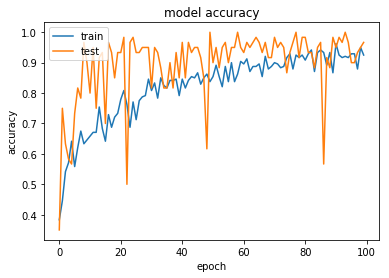

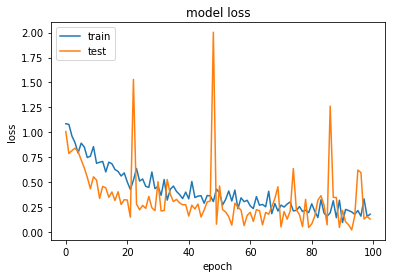

In [5]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Training Results

> The accuracy is increased from 65%, and increasing to around 90% (sometimes can reach

```
Epoch 1/200
12/12 [==============================] - 2s 200ms/step - loss: 1.1204 - acc: 0.3625 - val_loss: 1.0212 - val_acc: 0.6500

Epoch 2/200
12/12 [==============================] - 1s 79ms/step - loss: 1.0842 - acc: 0.5083 - val_loss: 0.9045 - val_acc: 0.5333

Epoch 3/200
12/12 [==============================] - 1s 81ms/step - loss: 0.9571 - acc: 0.5167 - val_loss: 0.8209 - val_acc: 0.5833

Epoch 4/200
12/12 [==============================] - 1s 85ms/step - loss: 0.9834 - acc: 0.4833 - val_loss: 0.7030 - val_acc: 0.7000

Epoch 5/200
12/12 [==============================] - 1s 85ms/step - loss: 0.7938 - acc: 0.6375 - val_loss: 0.6138 - val_acc: 0.7833

...


...


...


Epoch 192/200
12/12 [==============================] - 1s 84ms/step - loss: 0.2081 - acc: 0.9458 - val_loss: 0.3122 - val_acc: 0.9667

Epoch 193/200
12/12 [==============================] - 1s 85ms/step - loss: 0.1375 - acc: 0.9667 - val_loss: 0.2541 - val_acc: 0.9333

Epoch 194/200
12/12 [==============================] - 1s 85ms/step - loss: 0.0782 - acc: 0.9833 - val_loss: 0.2743 - val_acc: 0.9500

Epoch 195/200
12/12 [==============================] - 1s 85ms/step - loss: 0.2329 - acc: 0.9333 - val_loss: 0.5074 - val_acc: 0.8833

Epoch 196/200
12/12 [==============================] - 1s 85ms/step - loss: 0.0828 - acc: 0.9625 - val_loss: 0.5009 - val_acc: 0.9333

Epoch 197/200
12/12 [==============================] - 1s 92ms/step - loss: 0.1996 - acc: 0.9542 - val_loss: 0.0201 - val_acc: 1.0000

Epoch 198/200
12/12 [==============================] - 1s 106ms/step - loss: 0.1463 - acc: 0.9500 - val_loss: 0.1955 - val_acc: 0.9167

Epoch 199/200
12/12 [==============================] - 1s 89ms/step - loss: 0.1053 - acc: 0.9542 - val_loss: 0.7008 - val_acc: 0.8500

Epoch 200/200
12/12 [==============================] - 1s 85ms/step - loss: 0.1061 - acc: 0.9667 - val_loss: 0.0288 - val_acc: 1.0000
```